<a href="https://colab.research.google.com/github/hanna-joo/statistics/blob/master/stat_python/ch_10_ANOVA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10장. 분산분석 (ANOVA: Analysis of Variance)
part 01
  - 10.1. 분산분석 기초
  - 10.2. 일원분산분석
  - 10.3. 이원분산분석
  ___
part 02
  - 10.4. 다변량분산분석
  - 10.5. 공분산분석

## 10.0. 준비하기

In [1]:
# 한글 파일 설정
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
# 런타임 다시 시작하기

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (10, 7)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [4]:
# 구글 드라이브 연동
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)       
          # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)

/content/drive
Mounted at /content/drive


In [5]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata
'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


In [6]:
# 분산분석 패키지 설치
!pip install scikit_posthocs # 다양한 사후분석 기능 제공
!pip install pingouin

     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=a9b7d6f1fdec13977621f39b7202553c7fd97507d47e9a58396492bde4f772c4
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=a56a9cf1a84c8187ab68911ee21da4fc74393474dcde85cc5d5274edf60991c1
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=d6b10465576e4e39bbb0e29ec3a867108c9bd30592b2a5a9b895c45fad105ebb
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [7]:
# 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
import scipy as sp
import pingouin as pg
import scikit_posthocs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

## 10.4. 다변량분산분석 (MANOVA: Multivariate Analysis of Variance)
### (1) 개념 및 주요 이론
- 종속변수 2개 이상
- 종속변수는 벡터변수, 벡터 간 거리를 검증하는 것이 다변량분산분석
- **종속변수 사이에 상관관계가 존재하는지**를 먼저 파악!!!
  + 상관관계가 없다면 단일변량 분산분석으로 각각 분석을 진행해도 무방
  + 상관관계가 있다면 다변량 분산분석으로 진행
- 다변량 분산분석 통계량: 유의성 검증을 위해 살벼봐야 하는 주요 분석지표

|다변량 통계치|설명|값|
|:------|:------------|:---|
|Pillai's Trace|집단간분산/총분산|클수록 유의|
|Wilk's Lambda|집단내분산/총분산|값이 작을수록 유의|
|Hotteling's T2|집단간분산/집단내분산|클수록 유의|

### (2) 분석 및 해석
- 문제
  + A 쇼핑에서는 다변량분산분석을 통해 구매유형, 거주지역에 따라 방문빈도 및 총 매출액의 차이를 검정하려 한다.  

- 가설 
  + H0(귀무가설) = A 쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 없다.
  + H1(연구가설) = A 쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 있다.

In [20]:
# 0. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats  # 상관관계 모듈
from statsmodels.multivariate.manova import MANOVA  # 다변량분산분석 모듈

df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

df1 = df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format
df1.head()

,총_매출액,방문빈도,구매유형,거주지역
0,4007080,17,4,6
1,3168400,14,4,4
2,2680780,18,4,6
3,5946600,17,4,5
4,13745950,73,2,6


In [21]:
# 1. 종속변수 간 상관관계 분석
df_temp = df[['총_매출액','방문빈도']]
print(stats.pearsonr(df_temp.총_매출액, df1.방문빈도))

(0.6311706453193392, 3.0519604496887203e-112)


In [22]:
# 2. 다변량분산분석
print(MANOVA.from_formula('방문빈도+총_매출액 ~ 구매유형+거주지역', data=df1).mv_test())
  # 아래에 전체 모형의 적합성/거주지역과 구매유형에 대한 각각의 다변량분석모형의 결과가 순서대로 출력

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [13]:
# 3. 사후분석
  # 패키지 불러오기
import scikit_posthocs
import numpy as np
  # 수치형데이터 문자열로 변환
df1['구매유형'] = df1['구매유형'].astype(str)
df1['거주지역'] = df1['거주지역'].astype(str)
print('구매유형 총매출액 사후분석 \n',scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='구매유형'))
print('\n거주지역 총매출액 사후분석\n', scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액',group_col='거주지역'))
print('\n거주지역 총매출액 사후분석\n', scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도',group_col='구매유형'))
print('\n거주지역 총매출액 사후분석\n', scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도',group_col='거주지역'))

구매유형 총매출액 사후분석 
       4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000

거주지역 총매출액 사후분석
       6     4     5     7     3     2     1
6 1.000 0.008 0.002 0.000 0.019 0.339 0.988
4 0.008 1.000 1.000 0.000 0.978 0.980 1.000
5 0.002 1.000 1.000 0.000 0.935 0.965 1.000
7 0.000 0.000 0.000 1.000 0.000 0.000 0.412
3 0.019 0.978 0.935 0.000 1.000 1.000 1.000
2 0.339 0.980 0.965 0.000 1.000 1.000 1.000
1 0.988 1.000 1.000 0.412 1.000 1.000 1.000

거주지역 총매출액 사후분석
       4     2     1     3
4 1.000 0.000 0.030 0.998
2 0.000 1.000 0.000 0.000
1 0.030 0.000 1.000 0.075
3 0.998 0.000 0.075 1.000

거주지역 총매출액 사후분석
       6     4     5     7     3     2     1
6 1.000 0.000 0.000 0.000 0.000 0.005 0.451
4 0.000 1.000 0.913 0.000 0.370 0.604 0.949
5 0.000 0.913 1.000 0.000 0.040 0.303 0.878
7 0.000 0.000 0.000 1.000 0.000 0.000 0.018
3 0.000 0.370 0.040 0.000 1.000 0.999 1.000
2 0.005 0.604 0.303 0.000 0.999 1.000 1.000
1 0.451 0.94

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
# 4. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역',values='총_매출액',aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n', 평균총매출액)
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역',values='방문빈도',aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n', 평균방문빈도)


구매유형, 거주지역별 평균총매출액
 거주지역           1           2           3  ...            5            6            7
구매유형                                      ...                                       
1            nan 3281350.000 3002825.000  ...  3637031.667  3712146.667  3864880.000
2            nan         nan 4215648.571  ...  6590330.674 10226770.763 13513839.437
3    4906400.000 3215055.000 6809777.143  ... 11046081.250 13768678.750 25451441.176
4            nan 4034175.556 3720989.697  ...  4272964.468  4749139.200  5138468.276

[4 rows x 7 columns]

구매유형, 거주지역별 평균방문빈도
 거주지역     1      2      3      4      5      6      7
구매유형                                                
1      nan  8.000  8.667 10.818 10.222  9.667 10.000
2      nan    nan 29.143 42.312 39.022 48.212 58.845
3    7.750  5.000  7.929 11.903 15.350 20.438 40.765
4      nan 12.778 12.485 17.277 18.000 18.768 19.966


- 결과 해석
1. 종속변수 간 상관관계 분석
  + 방문빈도와 총 매출액 간 유의한 상관관계 존재
2. 다변량분산분석
  + 전체 모형의 적합성 / 각 종속변수에 대한 다변량분산 분석모형 결과
  + 모두 유의확률 0.01 이하로 모형이 유의미
3. 사후분석
  + 총매출액
    + 구매유형: 1-4 제외 나머지 유형 간 차이 유의
    + 거주지역: 3-6, 4-6, 5-6, 2-7, 3-7, 4-7, 5-7, 6-7 총매출액 차이 유의
  + 방문빈도
    + 구매유형: 1-3, 3-4 제외 나머지 유형 간 유의
    + 거주지역: 3-5, 2-6, 3-6, 4-6, 5-6, 1-7, 2-7, 3-7, 4-7, 5-7, 6-7 방문빈도 차이 유의
4. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도

### (3) 시각화

In [15]:
# 패키지 불러오기
import matplotlib
import matplotlib.pyplot as plt

X = np.hstack(평균방문빈도.values[0:4])
Y = np.hstack(평균총매출액.values[0:4])

In [16]:
평균방문빈도

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,nan,8.000,8.667,10.818,10.222,9.667,10.000
2,nan,nan,29.143,42.312,39.022,48.212,58.845
3,7.750,5.000,7.929,11.903,15.350,20.438,40.765
4,nan,12.778,12.485,17.277,18.000,18.768,19.966


In [17]:
X

array([        nan,  8.        ,  8.66666667, 10.81818182, 10.22222222,
        9.66666667, 10.        ,         nan,         nan, 29.14285714,
       42.3125    , 39.02247191, 48.21186441, 58.84507042,  7.75      ,
        5.        ,  7.92857143, 11.90322581, 15.35      , 20.4375    ,
       40.76470588,         nan, 12.77777778, 12.48484848, 17.27678571,
       18.        , 18.768     , 19.96551724])

In [18]:
# 한글깨짐현상 방지
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'

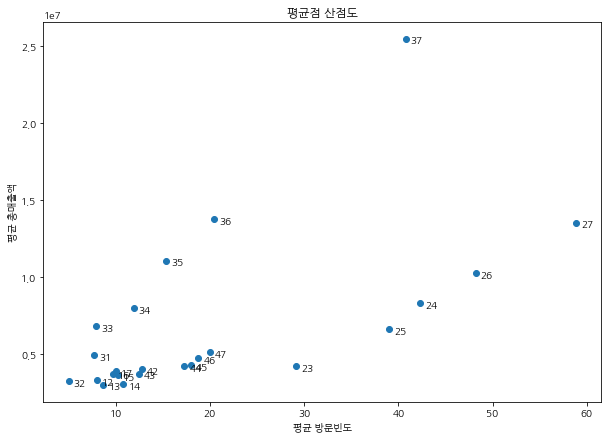

In [19]:
# 평균점 산점도 그리기
labels = []
for i in range(1,5,1):
  for j in range(1,8,1):
    labels.append(str(i)+str(j))

for label, x_count, y_count in zip(labels,X,Y):
  plt.annotate(label,
               xycoords='data',
               textcoords='offset points',
               xy=(x_count,y_count),
               xytext=(5,-5))
  
plt.title('평균점 산점도') # 차트제목
plt.xlabel('평균 방문빈도') # X축 이름
plt.ylabel('평균 총매출액') # Y축 이름
plt.plot(X,Y,'o')
plt.show()

- 결과 해석
  + 다변량분산분석: 거주지역, 구매유형에 따라 총 매출액과 방문빈도 차이는 모두유의
  + 구매유형 3,2인 고객들이 상대적으로 1,4인 고객보다 평균 방문빈도가 높음
  + 거주지역 4,5,6,7인 고객들이 나머지 지역보다 상대적으로 평균 총매출액이 높음
  + 구매,거주(37, 27)인 고객들은 타 영역에 비해 상당히 큰 차이  
      -> 해당 그룹 고객들에 대해 각 세그먼트에 적합한 마케팅 전략 추진

## 10.5. 공분산분석 (ANCOVA: Analysis of Covariance)
### (1) 개념 및 주요 이론
- 공변량을 통제함으로써 순수한 독립변수의 효과만을 보는 것이 원칙
- 종속변수에 영향을 줄 수 있는 연속형 외생변수의 효과 제거
- 순수하게 집단 간 종속변수의 평균 차이 분석 
- 잔차 부분이 없다면 회귀분석 모형
- __분산분석의 변형으로서의 공분산분석__
  + 단순히 범주형 변수만을 고려하는 분산분석 과정에서 생겨날 수 있는 문제점에 대한 보완책
  + 명목척도로 측정된 독립변수와 등간/비율 척도로 측정된 독립변수가 함께 존재할 경우 사용되는 분석방법
  + 등간/비율 척도인 공변량(Covariate)과 종속변수간 관계 파악하여  
  공변량이 종속변수에 미치는 효과 제거 후 수정된 종속변수의 평균값을 이용해  
  분산분석 실시하는 분석방법
- __회귀분석에서 범주형 변수를 통제하는 분석__
  + 연속형 종속변수와 연속형 독립변수간의 회귀분석 과정에서 범주형 변수의 효과가 개입되는 경우
  + 단순히 두 연속형 변수간의 회귀분석모형만을 고려하는 경우에 생겨날 수 있는 문제점에 대한 보완책
  + 범주형 변수의 각 수준에 따라 서로 다른 회귀직선이 적합되는 것이 바람직한지 판단하고  
  각 범주의 수준에 따른 회귀분석 절차를 수행 가능
  + 자세한 내용은 11장에서
- __공분산분석의 종류__
  + 공변량 외 독립변수 1개: 일원공분산분석
  + 공변량 외 독립변수 2개 이상: 다원 공분산분석
  + 종속변수가 2개 이상: 다변량 공분산분석

### (2) 분석 및 해석
- 문제
  + 앞서 거주지역별 총 매출액의 차이가 있는지 일원분산분석을 통해 검증하였다.  
  그러나 총매출액에는 거주지역뿐만 아니라, 고객들의 방문빈도 역시 유의미한 변수일 수 있다.  
  공분산분석을 통해 방문빈도를 통제한 상태에서 거주지역별 총 매출액 차이를 검정해보자.

- 가설 
  + H0(귀무가설) = 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다.
  + H1(연구가설) = 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다.

In [24]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
import pingouin as pg

df = pd.read_csv('Ashopping.csv',sep=',',encoding='CP949')
df1 = df[['총_매출액','방문빈도','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

df1.head()

,총_매출액,방문빈도,거주지역
0,4007080,17,6
1,3168400,14,4
2,2680780,18,6
3,5946600,17,5
4,13745950,73,6


In [25]:
# 2. 공분산분석 (공변량 통제 O)
print('공분산분석 결과\n',pg.ancova(dv='총_매출액',between='거주지역',covar='방문빈도',data=df1))

# 3. 일원분산분석 (공변량 통제 X)
print('\n일원분산분석 결과\n',pg.anova(dv='총_매출액',between='거주지역',data=df1))

공분산분석 결과
      Source                    SS   DF       F  p-unc   np2
0      거주지역   696696841274948.000    6   4.046  0.001 0.024
1      방문빈도 13701443685723464.000    1 477.393  0.000 0.325
2  Residual 28470960329516344.000  992     nan    nan   nan

일원분산분석 결과
   Source  ddof1  ddof2      F  p-unc   np2
0   거주지역      6    993 24.759  0.000 0.130


- 결과 해석
  + 위의 두 분산분석 모두 유의
  + 공변량 통제한 분산분석 F값은 4.046
  + 공변량 통제않은 분산분석 F값은 24.759  
    -> 방문빈도 역시 매출액에도 일정한 영향을 주고 있다.  
    -> 거주지역에 따른 매출액 차이 고려 시 방문빈도 통제하지 않으면 거주지역별 차이가  과대평가 될 수 있다.